# Hotel Booking Cancellation 
Created: by Nur Ilmalani 

## Business Problem Understanding

**Context**

Sebuah perusahaan perhotelan besar ingin menganalisis data pemesanan hotel untuk memahami pola pembatalan pemesanan. Dalam beberapa tahun terakhir, banyak pelanggan yang melakukan pemesanan hotel tetapi kemudian membatalkannya. Perusahaan ingin mengetahui faktor-faktor apa saja yang memengaruhi keputusan pelanggan untuk membatalkan pemesanan, agar mereka bisa mengambil langkah-langkah pencegahan yang tepat. Informasi terkait pelanggan, durasi menginap, jenis kamar, metode pembayaran, dan informasi lainnya tersedia dari data pemesanan hotel.

Perusahaan bertujuan untuk mengurangi tingkat pembatalan dengan cara memperkecil faktor-faktor yang memengaruhi keputusan pelanggan untuk membatalkan pemesanan dan memprediksi apakah pemesanan tertentu kemungkinan besar akan dibatalkan atau tidak.

Target:

* 0 : Tidak membatalkan pemesanan

* 1 : Membatalkan pemesanan

**Stakeholder**
Stakeholder dalam analisis prediksi ini adalah tim administrasi hotel yang membutuhkan insight akan prediksi customer dalam melakukan pembatalan booking

**Problem Statement**:

Tingkat pembatalan pemesanan hotel yang tinggi dapat menyebabkan kerugian signifikan bagi hotel, terutama jika pembatalan terjadi pada saat yang mendekati tanggal check-in. Hal ini dapat mengurangi pendapatan hotel serta menyulitkan perencanaan alokasi kamar. Hotel ingin meningkatkan efisiensi operasional dengan memprediksi kemungkinan pembatalan pemesanan dari pelanggan sehingga mereka dapat mengambil langkah-langkah pencegahan, seperti kebijakan pembatalan yang lebih baik atau penawaran khusus untuk mengurangi pembatalan di menit terakhir.

Faktor-faktor yang dapat memengaruhi pembatalan meliputi lamanya masa menginap, jenis kamar yang dipilih, metode pembayaran, asal negara pelanggan, dan periode pemesanan.

**Goals**:

* Memprediksi apakah seorang pelanggan kemungkinan besar akan membatalkan pemesanan mereka atau tidak, berdasarkan informasi dari pemesanan sebelumnya.

* Mengidentifikasi variabel-variabel kunci yang mempengaruhi keputusan pembatalan pemesanan, sehingga hotel dapat membuat kebijakan yang lebih baik untuk meminimalkan pembatalan.

* Mengurangi tingkat pembatalan dengan memahami perilaku pelanggan dan meningkatkan strategi penjualan serta layanan pelanggan melalui penawaran khusus dan kebijakan pembatalan yang lebih efektif.

**Analytic Approach**:

Jadi, yang akan kita lakukan adalah menganalisis data pemesanan untuk menemukan pola yang memengaruhi keputusan pelanggan dalam membatalkan atau melanjutkan pemesanan mereka.

Kemudian, kita akan membangun model klasifikasi yang dapat membantu hotel memprediksi probabilitas apakah seorang pelanggan akan membatalkan pemesanannya atau tidak. Dengan model ini, hotel dapat lebih proaktif dalam menangani pemesanan yang berisiko dibatalkan dan mengurangi kerugian.

**Metric Evaluation**:

* Type 1 Error : **False Positive**
  
Konsekuensi: Hotel mungkin akan mengantisipasi pembatalan yang sebenarnya tidak terjadi, yang bisa mengarah pada penggunaan sumber daya yang tidak diperlukan (seperti menawarkan diskon atau penawaran khusus kepada pelanggan yang tidak berencana membatalkan).

* Type 2 Error : **False Negative**
  
Konsekuensi: Hotel tidak mengantisipasi pembatalan yang sebenarnya terjadi, yang bisa menyebabkan kerugian pendapatan karena kamar yang dibatalkan tidak segera dipesan ulang oleh pelanggan lain.

Berdasarkan konsekuensinya, model yang akan kita bangun perlu meminimalkan Type 2 Error (False Negative) agar hotel dapat mengantisipasi pembatalan lebih baik dan segera mengoptimalkan kamar yang tersedia tetapi diharapkan juga untuk memperhatikan Type 1 Error (False Positif) sehingga pelanngan tidak memiliki sensitiment negatif terhadap hotel dikarenakan ketersediaan kamar yang sudah di alokasikan. oleh karena itu Kita juga ingin memaksimalkan prediksi pembatalan yang benar tanpa terlalu banyak false negative maupun false positive. Oleh karena itu, metrik utama yang akan kita gunakan adalah F1 Score untuk melihat keseimbangan antara Precision dan Recall dari model yang dibangun.

Dengan pendekatan ini, analisis dan model yang dikembangkan dapat membantu hotel dalam mengambil tindakan preventif dan mengurangi tingkat pembatalan yang tidak diinginkan.

## Data Understanding
Data Source: https://drive.google.com/file/d/1eeXOEY5B_zfSNhWeDDqPWCo9hAyDRAbc/view?usp=drive_link

Note:
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Binary), beberapa dengan kardinalitas tinggi
- Setiap baris data merepresentasikan informasi pemesanan yang telah dilakukan dimasa lalu

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| country | Text | Country ID of origin |
| market_segment | Text | Market segment designation |
| previous_cancellations | Int | Number of previous bookings that were cancelled by the customer prior to the current booking |
| booking_changes | Int | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | Text | Indication on if the customer made a deposit to guarantee the booking |
| days_in_waiting_list | Int | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | Text | Type of booking |
| reserved_room_type | Text | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| required_car_parking_space | Int | Number of car parking spaces required by the customer |
| total_of_special_request | Int | No of employees in current employer's company |
| is_canceled | Int | Value indicating if the booking was canceled (1) or not (0). |

**Import Library**

In [7]:
#Modul Utama
import pandas as pd
import numpy as np

#Modul Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#Modul Preprocesiing
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce


#Modul split tuning parameter, & cross validasi
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV, RandomizedSearchCV

#Modul Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Modul metrics
from sklearn.metrics import  f1_score, classification_report, RocCurveDisplay


#Modul Feature Selection
from sklearn.feature_selection import  f_classif,SelectKBest

#Modul untuk Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline


#Modul untuk handling imbalance method
from imblearn.over_sampling import  SMOTE

#Modul untuk running time
import time


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Import Data
* Pertama kita akan mengimport data hitoris dari hotel booking demand 

In [9]:
# Mengimport data historis booking demand
df=pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


## Data Cleaning 
* Pada data cleaning kita akan melihat jumlah Missing Value dan Proporsi Missing Value dibandingkan keseluruhan data historis

In [11]:
# Menghitung nilai NaN disetiap kolom
count_null = pd.DataFrame(df.isnull().sum(), columns=['Jumlah Null'])

# Menghitung persentase nilai NaN disetiap kolom
precentage_null = pd.DataFrame(round(df.isna().sum()/df.shape[0]*100,2), columns=['Persentase Null (%)'])

# Gabungan kedua dataframe
combined = pd.concat([count_null, precentage_null], axis=1)

combined

,Jumlah Null,Persentase Null (%)
country,351,0.42
market_segment,0,0.00
previous_cancellations,0,0.00
booking_changes,0,0.00
deposit_type,0,0.00
days_in_waiting_list,0,0.00
customer_type,0,0.00
reserved_room_type,0,0.00
required_car_parking_spaces,0,0.00
total_of_special_requests,0,0.00


* Setelah melihat jumlah missing value sebesar 351 baris dari total baris sebanyak 83.573,
* dan jika dilihat secara proporsi jumlah baris yang memiliki Missing Value sebesar 0.42% dimana proporsi tersebut sangat kecil. Sehingga demi efisiensi waktu data missing value tersebut akan di drop dan melihat dari jumlah datanya, data missing value tidak akan berpengaruh signifikan pada hasil analisis

### Drop Missing Value

In [14]:
#Menghapus baris yang memiliki missing value
df.dropna(inplace=True)

### Drop Duplicate

In [16]:
# Melihat Data yang duplicate
df[df.duplicated()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


* Melihat jumlah data duplikat yang banyak maka data duplikat ini sebaiknya di drop/ hapus sehingga data tidak bias ke data duplikat 

In [18]:
# Drop Data yang duplicate
df=df.drop_duplicates()

## Define Feature & label
* Kemudian setelah data cleaned, kita akan mendefinisikan kolom fitur & Label
* kolom Label (y), adalah kolom yang akan kita prediksi 
* dimana kolom fitur (X) sebagai kolom independent atau kolom faktor yang memiliki pengaruh terhadap kolom Label

In [20]:
#define feature
X=df.drop('is_canceled',axis=1)


#define label
y=df['is_canceled']

#### Split Data
Demi menghindari data leakage, dari data historis akan kita split menjadi 4 data:
* X_train : Sebagai data yang digunakan untuk melatih model yang kita miliki 
* X_test : Di asumsikan sebagai data yang akan datang untuk melihat performa model yang telah kita buat
* y_train : Sebagai data yang kita gunakan untuk melihat seberapa akurat data prediksi
* y_test :  Sebagai data yang kita gunakan untuk melihat seberapa akurat data dimasa yang akan datang kita prediksi

In [22]:
# Memisahkan data menjadi data Train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

## Data Understanding

### Descriptive Statistic

`Data Numerik`

In [26]:
# Statistik Deskriptive untuk kolom numerik
X_train_num = X_train.select_dtypes(include = 'number')
X_train_num.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000
mean,0.080575,0.788893,3.668278,0.161398,0.946696
std,0.670259,1.276516,22.873124,0.383431,1.043148
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000
max,24.000000,21.000000,391.000000,8.000000,5.000000


* Statistik deskriptive digunakan untuk mempermudah dalam memahami sebaran data tiap kolom numerik

`Data Kategorik`

In [29]:
# Statistik Deskriptive untuk kolom kategorik
X_train_obj = X_train.select_dtypes(include = 'object')
X_train_obj.describe()

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,8067,8067,8067,8067,8067
unique,150,8,3,4,9
top,PRT,Online TA,No Deposit,Transient,A
freq,1603,3932,7886,5449,3647


* Statistik deskriptive digunakan untuk mempermudah dalam memahami sebaran data tiap kolom kategorik

### Exploratory Data Analysis (EDA)

* Selanjutnya untuk memahami data lebih lanjut kita akan melakukan explanatory data 

`Univariate`: Numeric

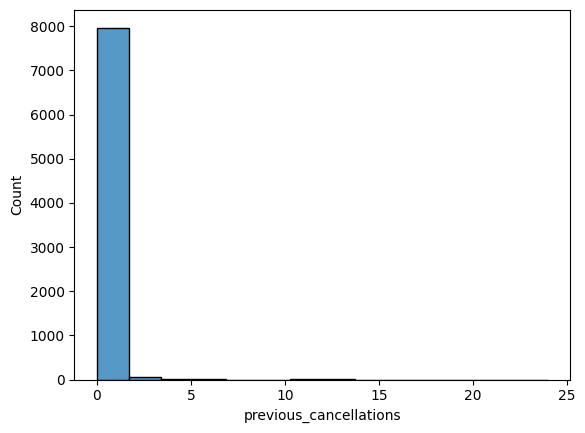

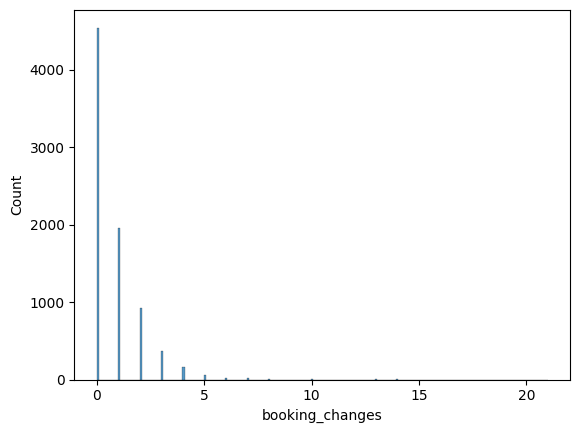

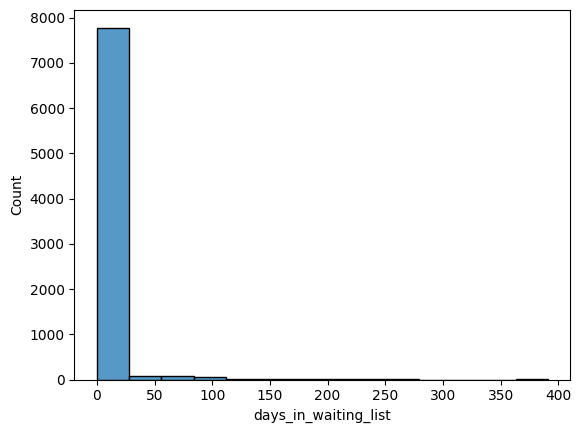

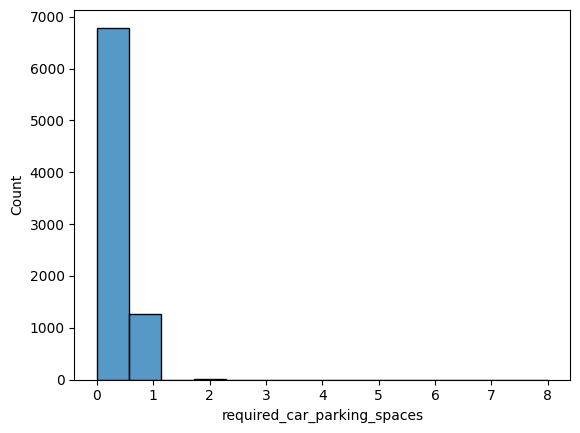

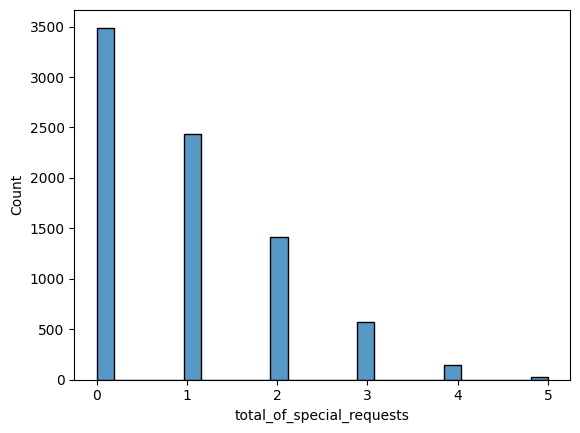

In [44]:
# Melihat Freakuensi kolom numerik (Univariate)
for x in X_train.select_dtypes(include = 'number').columns:
    sns.histplot(X_train_num[x])
    plt.show()

* dapat dilihat dari histplot bahwa sebaran data untuk seluruh kolom numerik merupakan skew positif 

`Outlier`: Numeric

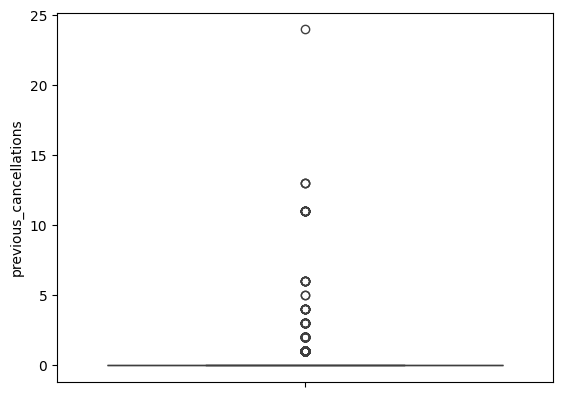

count    8067.000000
mean        0.080575
std         0.670259
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.000000
Name: previous_cancellations, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 306 proportion: 0.0379323168464113


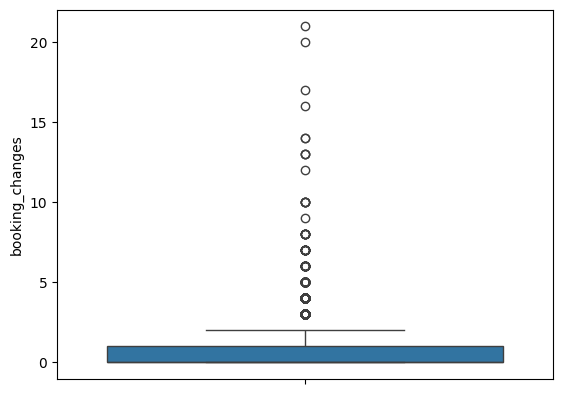

count    8067.000000
mean        0.788893
std         1.276516
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        21.000000
Name: booking_changes, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 650 proportion: 0.08057518284368415


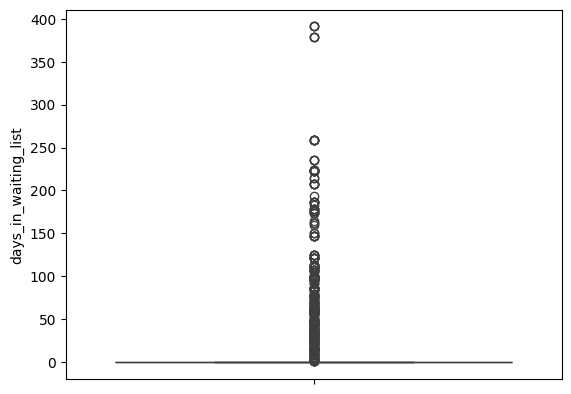

count    8067.000000
mean        3.668278
std        22.873124
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 365 proportion: 0.04524606421222264


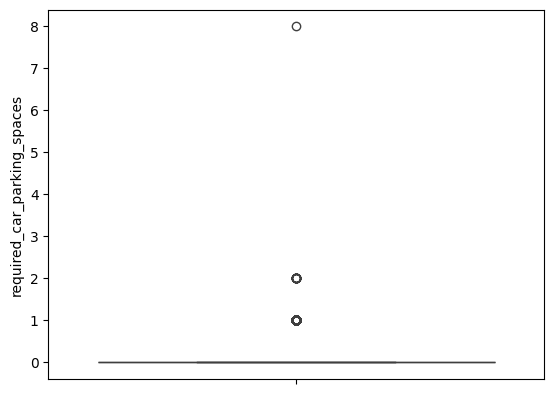

count    8067.000000
mean        0.161398
std         0.383431
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: required_car_parking_spaces, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 1276 proportion: 0.15817528201313996


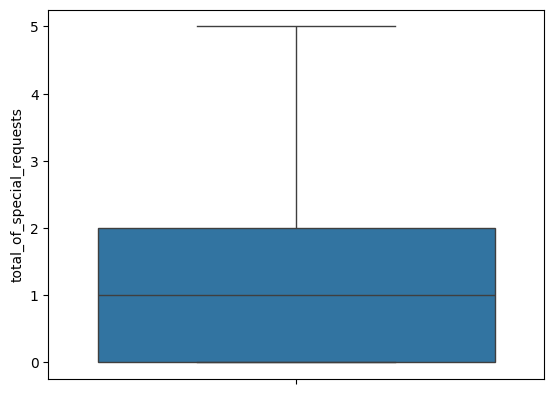

count    8067.000000
mean        0.946696
std         1.043148
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: total_of_special_requests, dtype: float64
upperlimit: 5
lowerlimit: 0
outlier: count: 0 proportion: 0.0


In [47]:
#Melihat outlier tiap kolom numerik dengan boxplot
for x in X_train_num.columns:
    # boxplot
    sns.boxplot(y=X_train_num[x])
    plt.show()
   
    
    # statistic metrics
    print(X_train_num[x].describe())
    q1 = np.percentile(X_train_num[x], 25)
    q3 = np.percentile(X_train_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(X_train_num[x][X_train_num[x]<=upperbound])
    lowerlimit = np.min(X_train_num[x][X_train_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = X_train_num[x][(X_train_num[x]>upperbound) | (X_train_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {}'.format(len(outlier), len(outlier)/len(X_train_num[x])))

* dapat dilihat dari ke 4 kolom numerik dapat diketahui bahwa hanya kolom total_of_special_request yang tidak memiliki outlier

`Univariate`: Kategorik

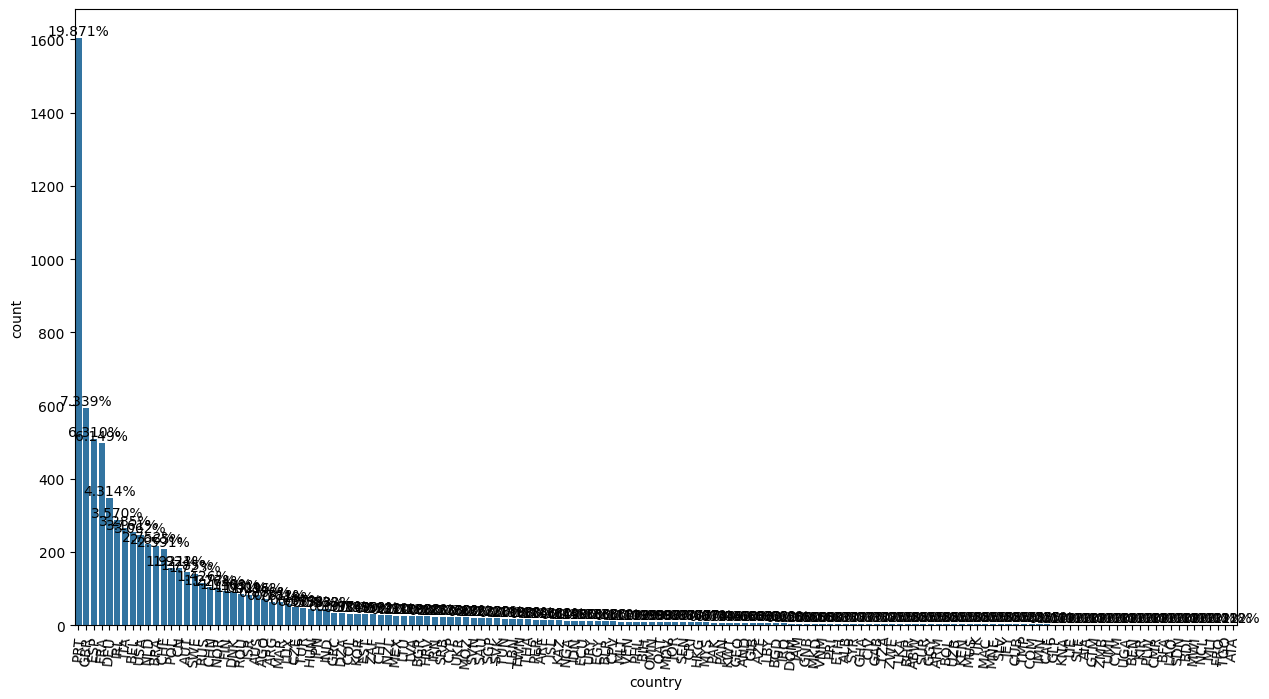

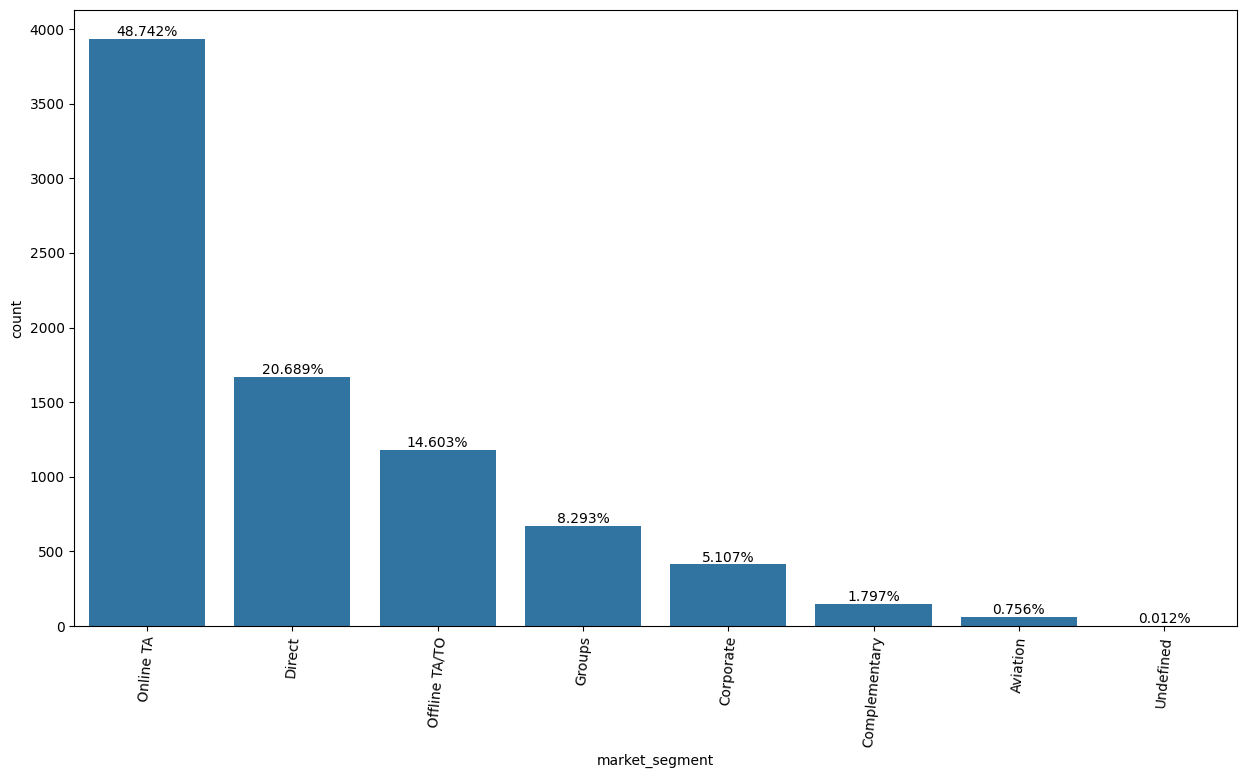

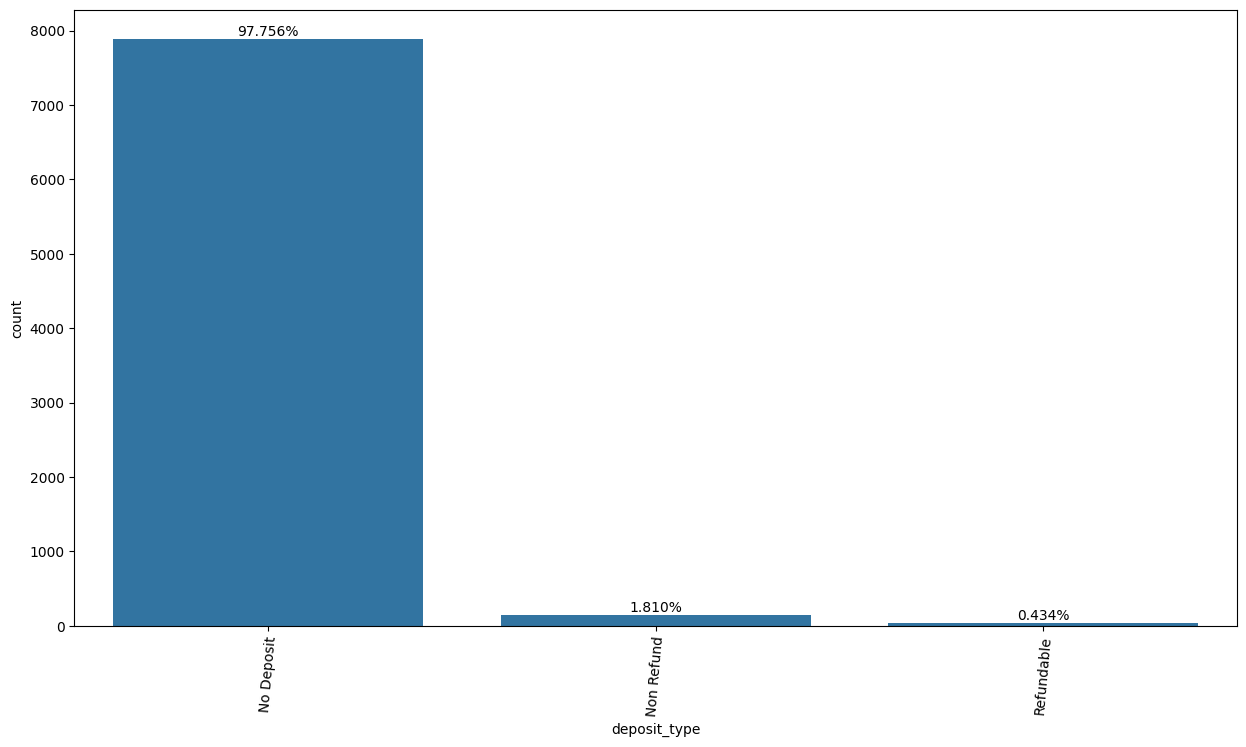

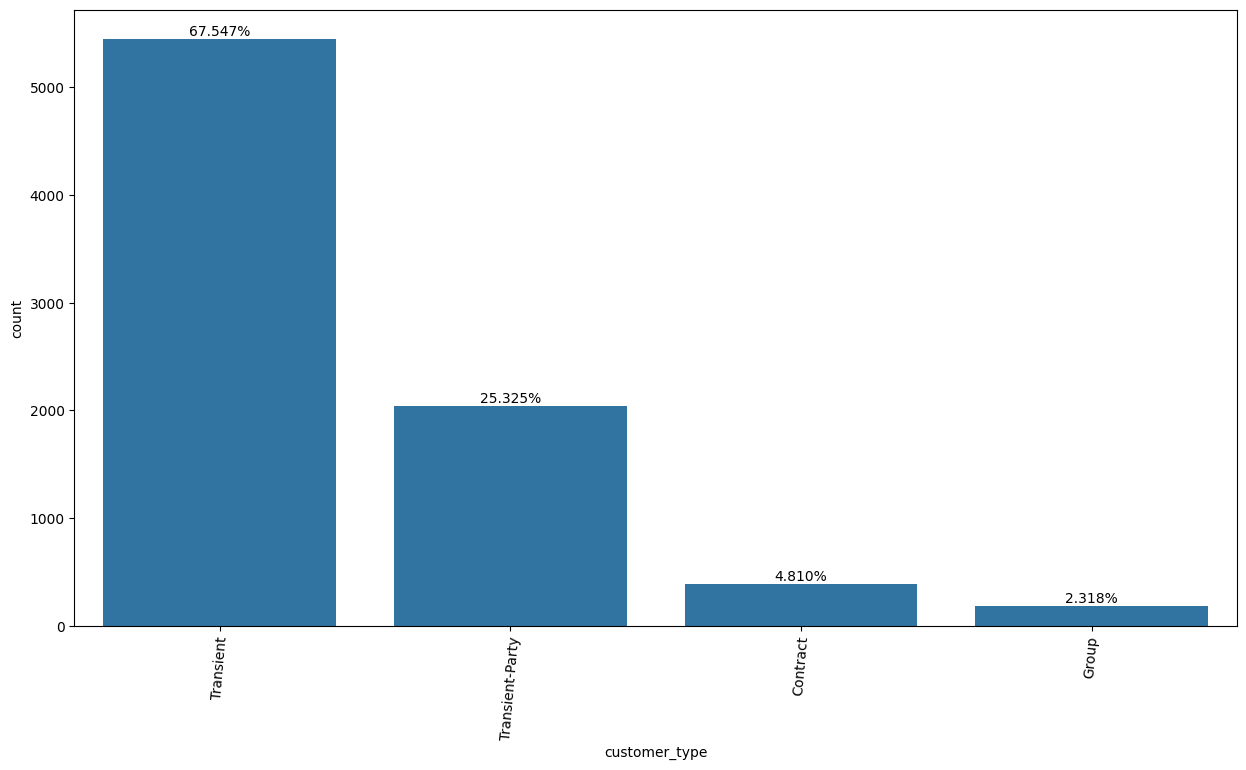

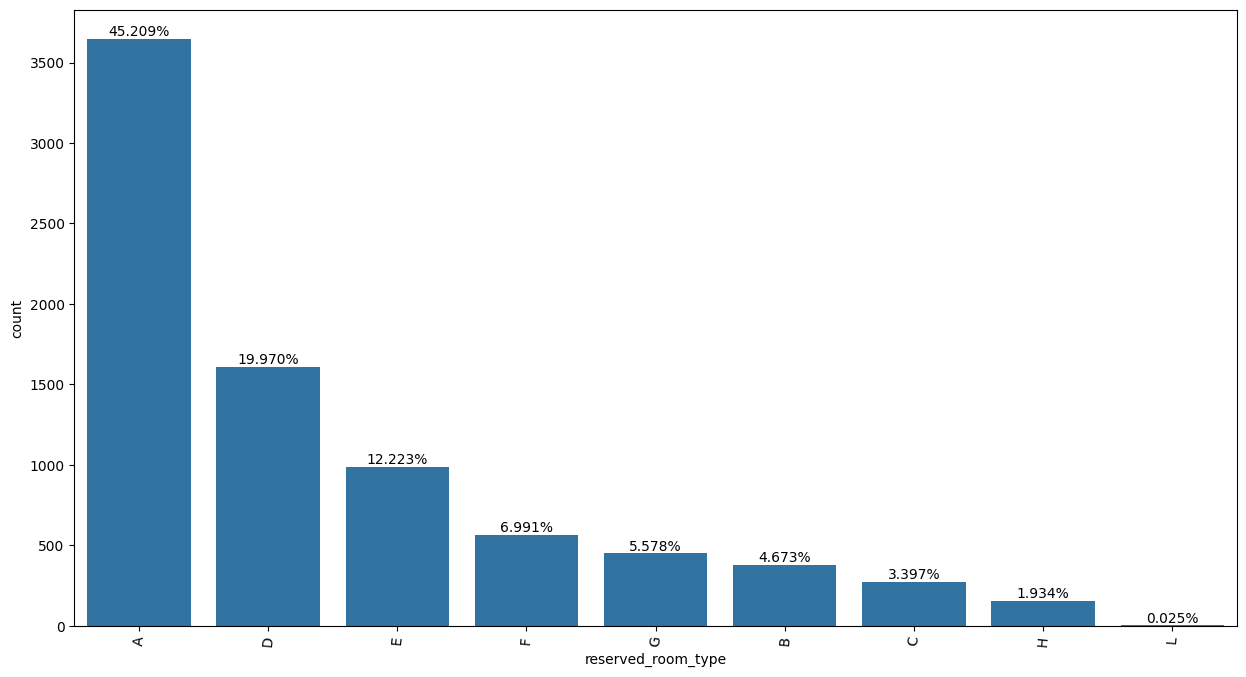

In [50]:
#Melihat frekuensi tiap kolom kategorik (Univariate)
for x in X_train.select_dtypes(include='object'):
    plt.figure(figsize=(15, 8), dpi=100)
    
    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = X_train[x].value_counts(ascending=False)
    
    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=X_train, x=x, order=count_values.index)
    
    # Rotasi label sumbu-x agar lebih mudah dibaca
    plt.xticks(rotation=85)
    
    # Hitung nilai relatif dalam persen
    rel_values = count_values.values / len(X_train) * 100
    
    # Buat label untuk setiap bar
    lbls = [f'{p:1.3f}%' for p in rel_values]
    
    # Pastikan jumlah bar dan label sama, lalu tambahkan label
    if len(ax.containers[0]) == len(lbls):
        ax.bar_label(container=ax.containers[0], labels=lbls)
    else:
        print(f'Warning: number of bars ({len(ax.containers[0])}) and labels ({len(lbls)}) do not match.')

    plt.show()


* dapat dilihat juga bahwa dari histogram di atas untuk kolom kategorik memiliki pola yang sama dengan kolom numerik dimana data skew positif

### Check for Imbalance Data
`Univariate`: Label

In [53]:
# Melihat jumlah data antara customer Canceled & Not Canceled
pie_df=pd.DataFrame(y_train)
pie_df=pie_df.value_counts().reset_index()
pie_df

,is_canceled,count
0,0,6150
1,1,1917


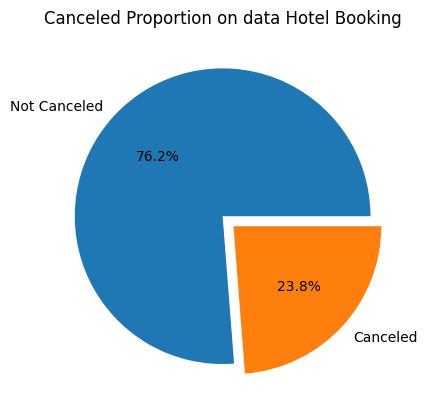

In [54]:
# Pie Chart untuk melihat proporsi data imbalance atau tidak
plt.pie(data=pie_df,x='count',labels=['Not Canceled','Canceled'], autopct='%1.1f%%'
       ,explode=(0,0.1))
plt.title('Canceled Proportion on data Hotel Booking')
plt.show()

* Jika dilihat dari jumlah data dan proporsi berdasarkan pie chart, bahwa dataset cukup imbalance sehingga dapat dilakukan sampling

`Bivariate` : Numerik vs Kategorik

previous_cancellations


,bin_previous_cancellations,mean,count
0,"(-0.001, 24.0]",0.237635,8067.0


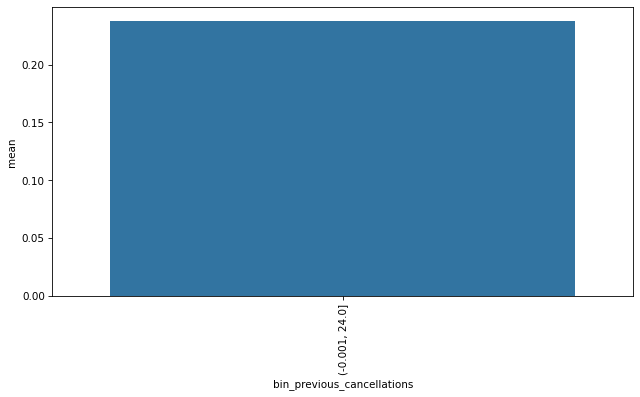

booking_changes


,bin_booking_changes,mean,count
0,"(-0.001, 1.0]",0.245614,6498.0
1,"(1.0, 21.0]",0.204589,1569.0


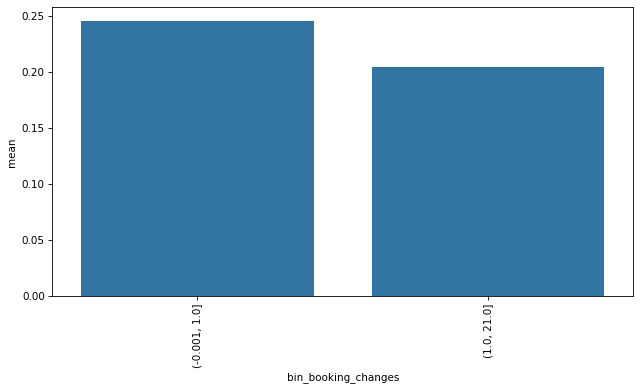

days_in_waiting_list


,bin_days_in_waiting_list,mean,count
0,"(-0.001, 391.0]",0.237635,8067.0


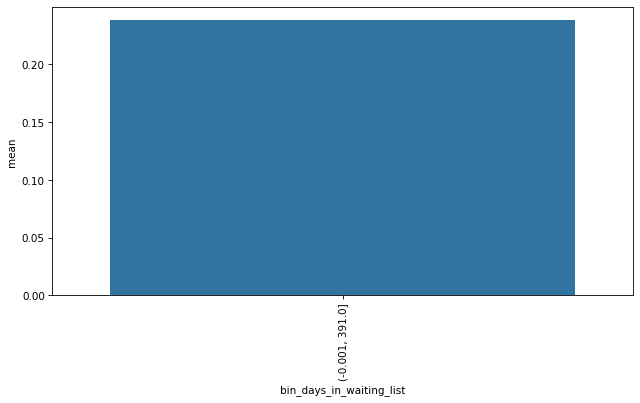

required_car_parking_spaces


,bin_required_car_parking_spaces,mean,count
0,"(-0.001, 8.0]",0.237635,8067.0


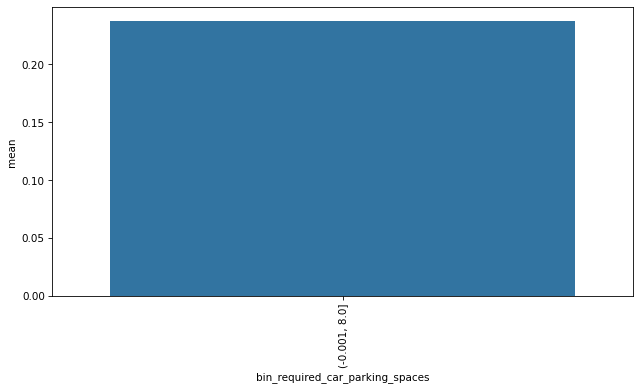

total_of_special_requests


,bin_total_of_special_requests,mean,count
0,"(-0.001, 1.0]",0.247510,5923.0
1,"(1.0, 2.0]",0.229844,1414.0
2,"(2.0, 5.0]",0.172603,730.0


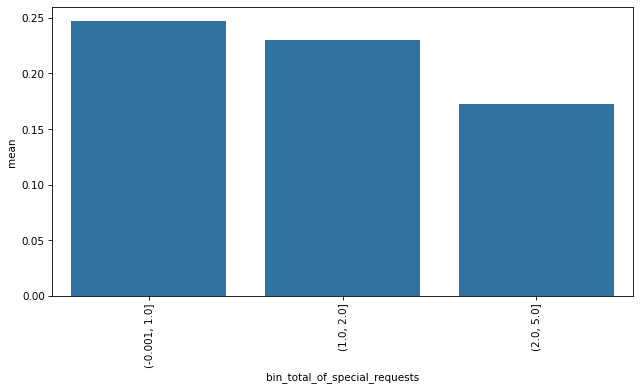

is_canceled


,bin_is_canceled,mean,count
0,"(-0.001, 1.0]",0.237635,8067.0


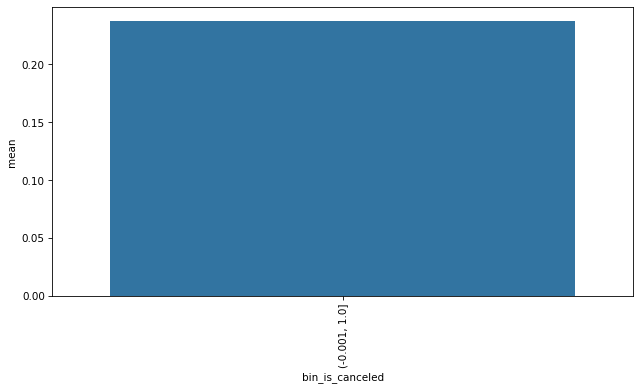

In [57]:
# Bivariate analysis untuk kolom Numerik Vs Kategorik
df_train=pd.concat([X_train,y_train],axis=1)
train_label=df_train.select_dtypes(include = 'number')
for x in train_label.columns:
    if x != 'survived':
        print(x)
        
        # Buat binning menggunakan qcut
        train_label[f'bin_{x}'] = pd.qcut(train_label[x], 5, duplicates='drop')
        
        # Kelompokkan berdasarkan bin dan hitung rata-rata survived
        train_label_agg = train_label.groupby(f'bin_{x}')['is_canceled'].describe().reset_index()[[f'bin_{x}','mean','count']]
        
        # Konversi kategori bin menjadi string agar lebih aman saat plotting
        train_label_agg[f'bin_{x}'] = train_label_agg[f'bin_{x}'].astype(str)
        
        # Tampilkan hasil pengelompokan
        display(train_label_agg)
        
        # Plot hasilnya
        plt.figure(figsize=(10, 5), dpi=75)
        sns.barplot(data=train_label_agg, x=f'bin_{x}', y='mean')
        plt.xticks(rotation=90)
        plt.show()

`Bivariate` : Numerik vs Numerik

#### Normality Test for Numerical

In [61]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = X_train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,previous_cancellations,0.000000e+00
1,booking_changes,0.000000e+00
2,days_in_waiting_list,0.000000e+00
3,required_car_parking_spaces,0.000000e+00
4,total_of_special_requests,1.891411e-217


* dilihat dari normality test, data numerik tidak terdistribusi normal dimana terbukti nilai p-value < 0.05

### Pengaruh masing - masing kolom terhadap label

Nilai korelasi spearman fitur previous_cancellations terhadap label adalah sebesar 0.06


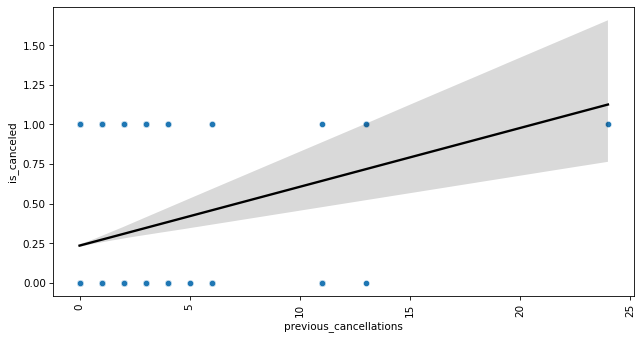

Nilai korelasi spearman fitur booking_changes terhadap label adalah sebesar -0.07


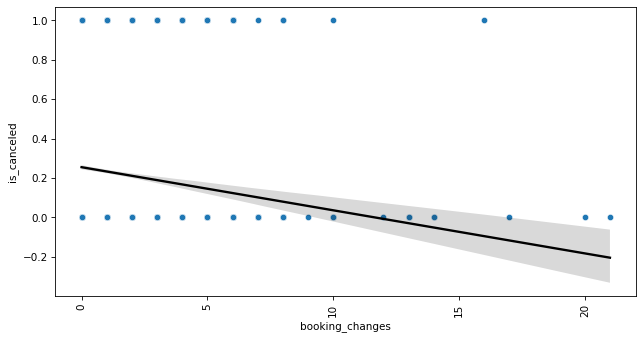

Nilai korelasi spearman fitur days_in_waiting_list terhadap label adalah sebesar 0.03


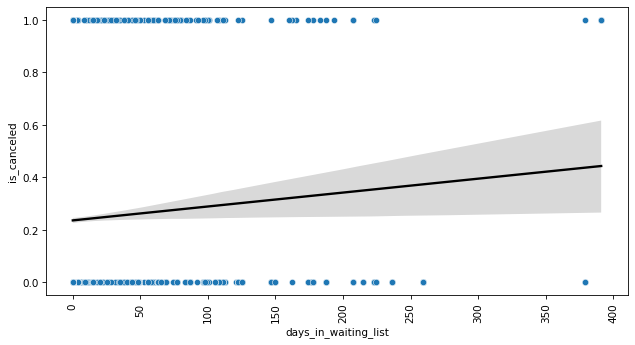

Nilai korelasi spearman fitur required_car_parking_spaces terhadap label adalah sebesar -0.24


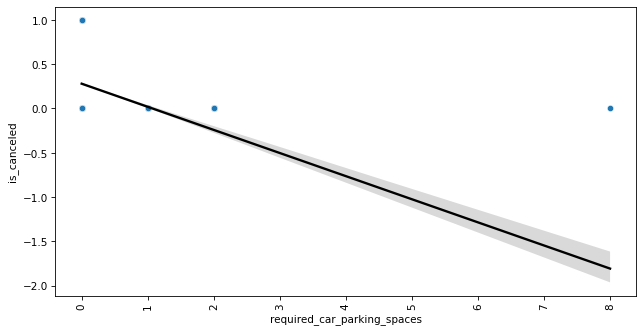

Nilai korelasi spearman fitur total_of_special_requests terhadap label adalah sebesar -0.07


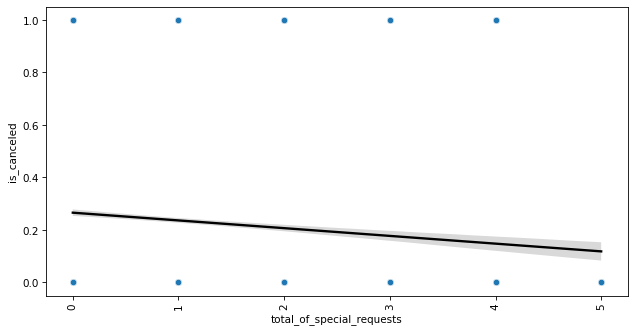

In [65]:
# Visualisasi pengaruh masing-masing kolom terhadap label (Scatter Plot)
for x in df_train.select_dtypes(include='number').columns:
    if x !='is_canceled':
        # Plot hasilnya
        print(f"Nilai korelasi spearman fitur {x} terhadap label adalah sebesar {round(df_train[[x,'is_canceled']].select_dtypes('number').corr()['is_canceled'][x],2)}")
        plt.figure(figsize=(10, 5), dpi=75)
        sns.scatterplot(data=train_label, x=x, y='is_canceled')
        sns.regplot(data=train_label, x=x, y='is_canceled',scatter=False,color='black')
        plt.xticks(rotation=90)
        plt.show()
    else:
        continue

* dapat dilihat dari garis regplot pada scatter plot di atas bahwa masing-masing kolom memiliki pengaruh terhadap label

### Multicolinearity

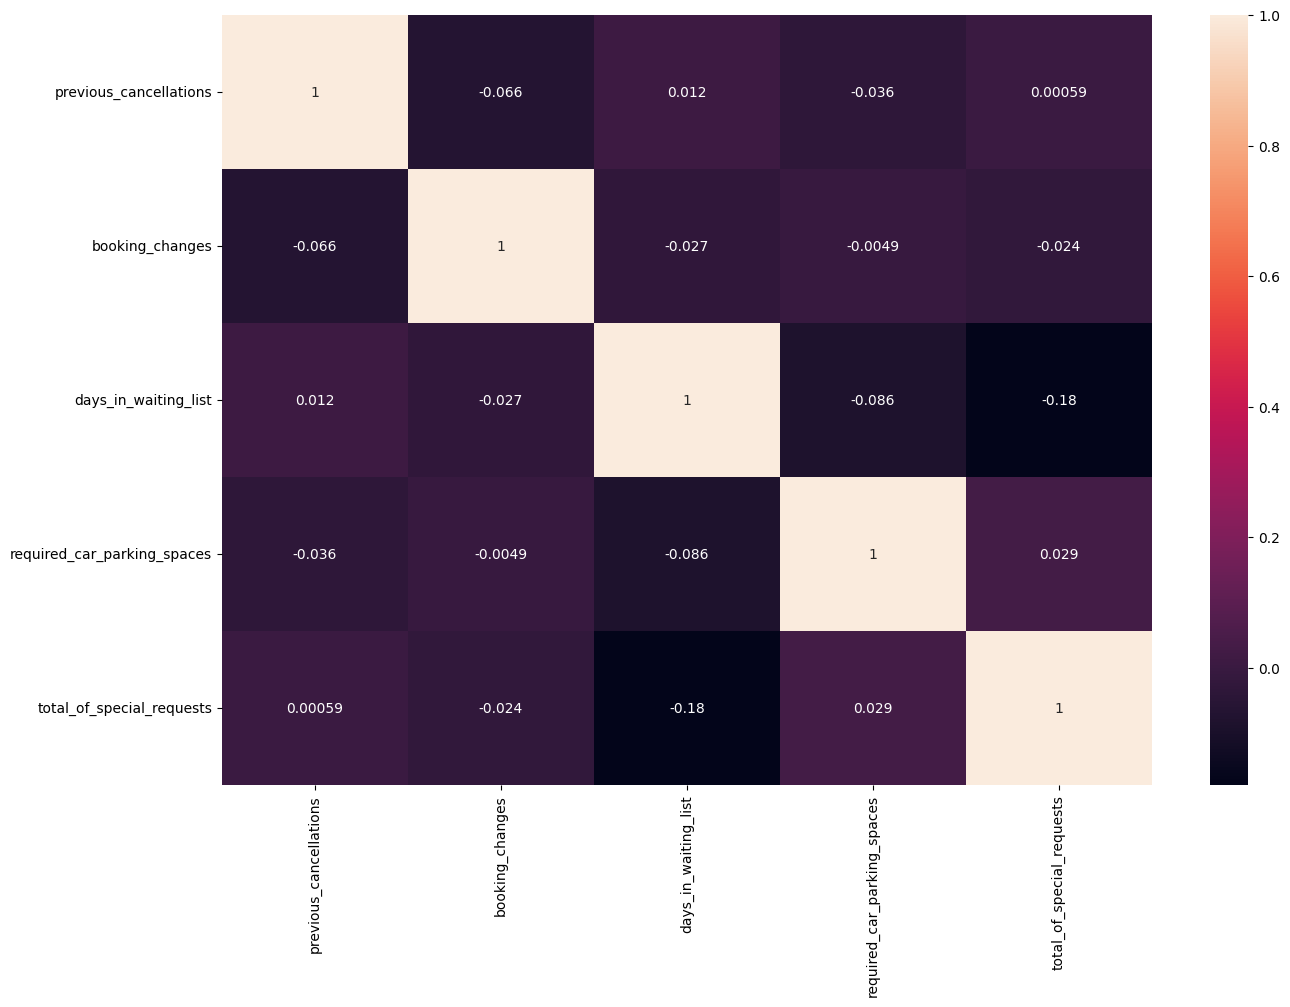

In [68]:
#Heatmap untuk melihat hubungan antar feature (Multicolinearity)
plt.figure(figsize=(15,10))
sns.heatmap(X_train.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

* dilihat dari heatmap tidak terdapat korelasi yang tinggi antar feature sehingga tidak ada feature yang akan merusak proses modeling

previous_cancellations


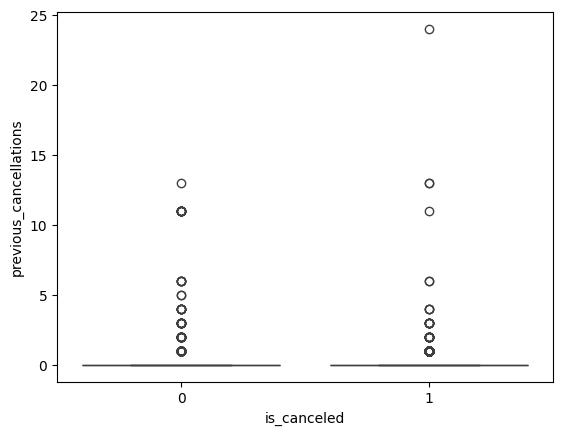

booking_changes


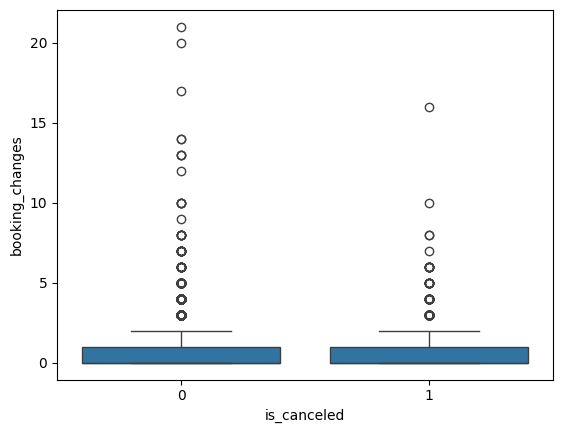

days_in_waiting_list


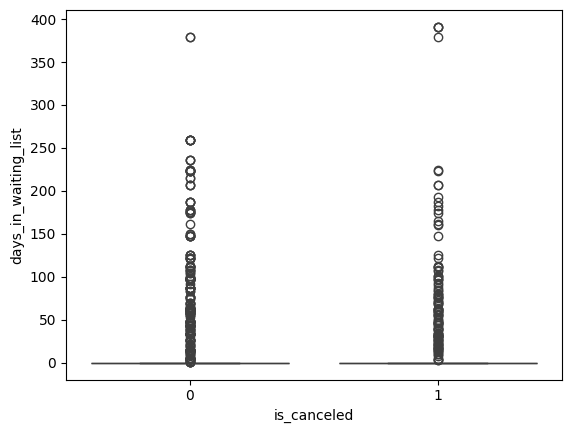

required_car_parking_spaces


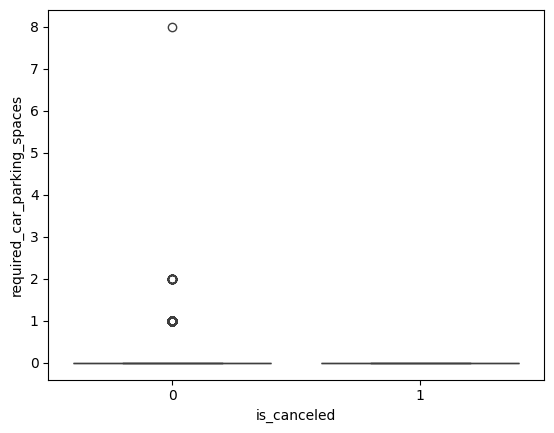

total_of_special_requests


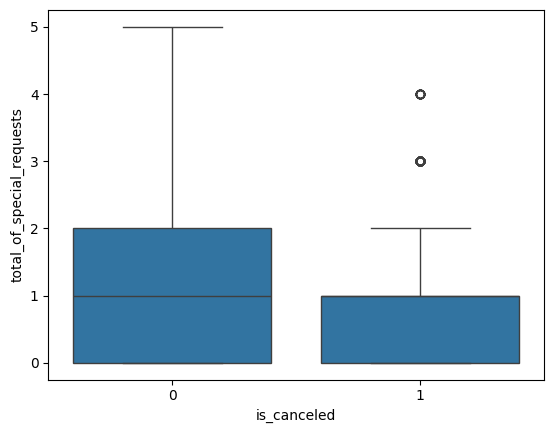

In [70]:
# Visualisasi data outlier menggunakan boxplot
for x in df_train.select_dtypes('number').columns:
    if x !='is_canceled':
        print(x)
        sns.boxplot(data = df_train.select_dtypes('number'), y=x, x = 'is_canceled')
        plt.show()
    else:
        continue

`Bivariate` : Kategorik vs Kategorik

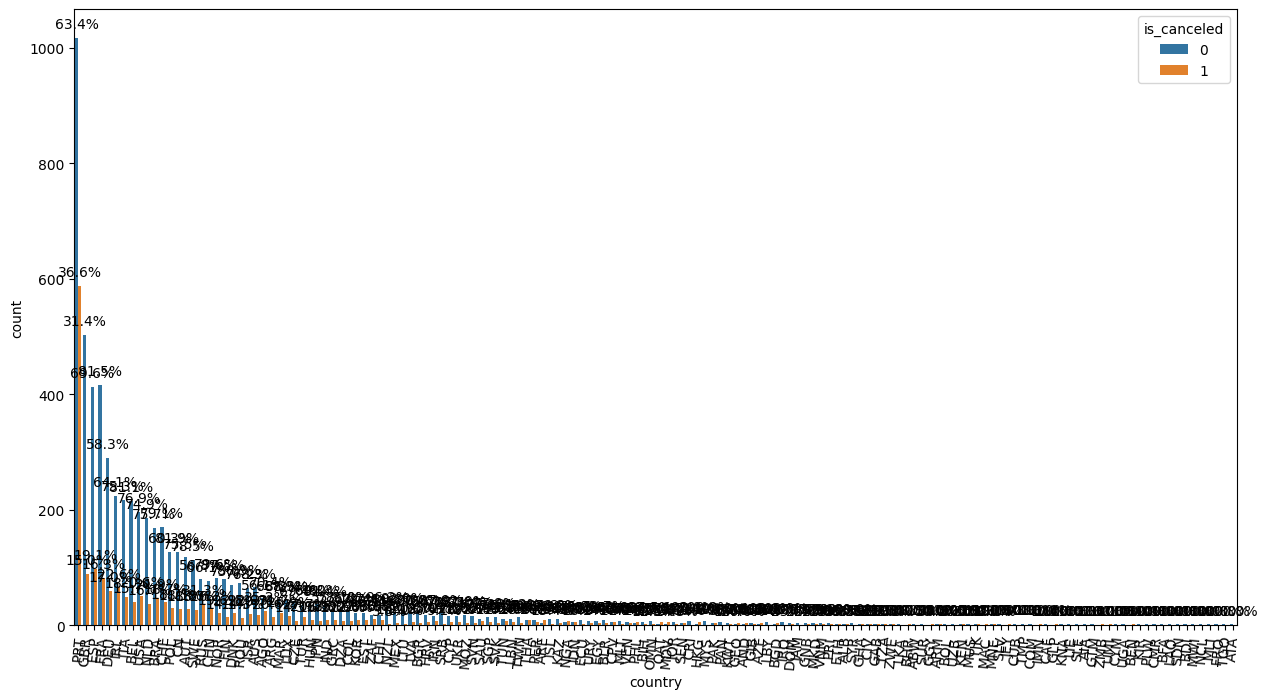

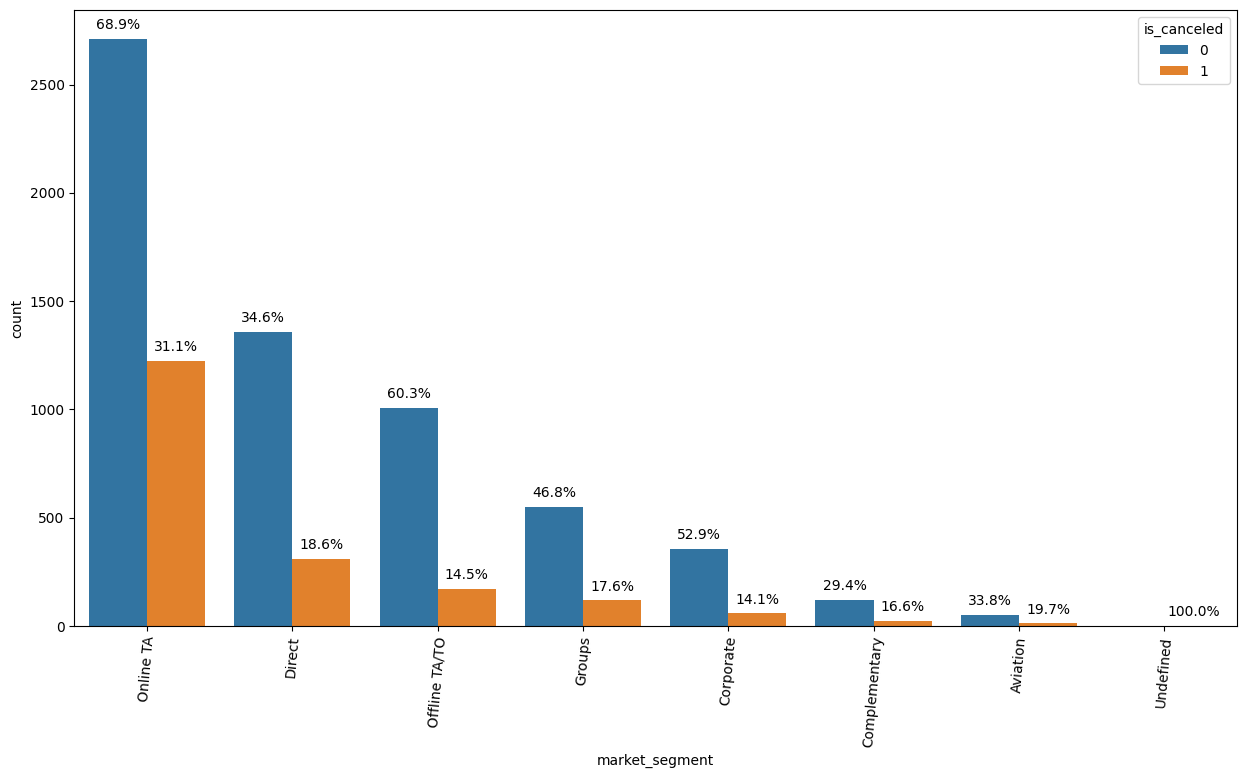

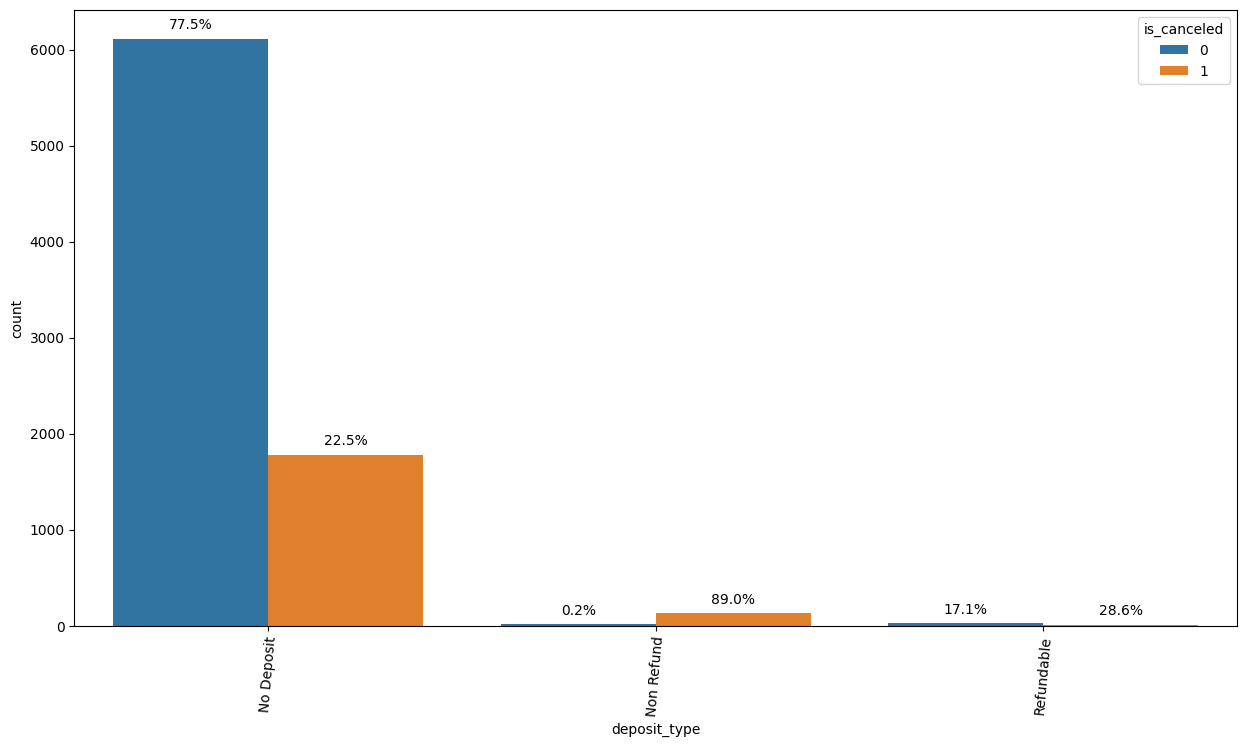

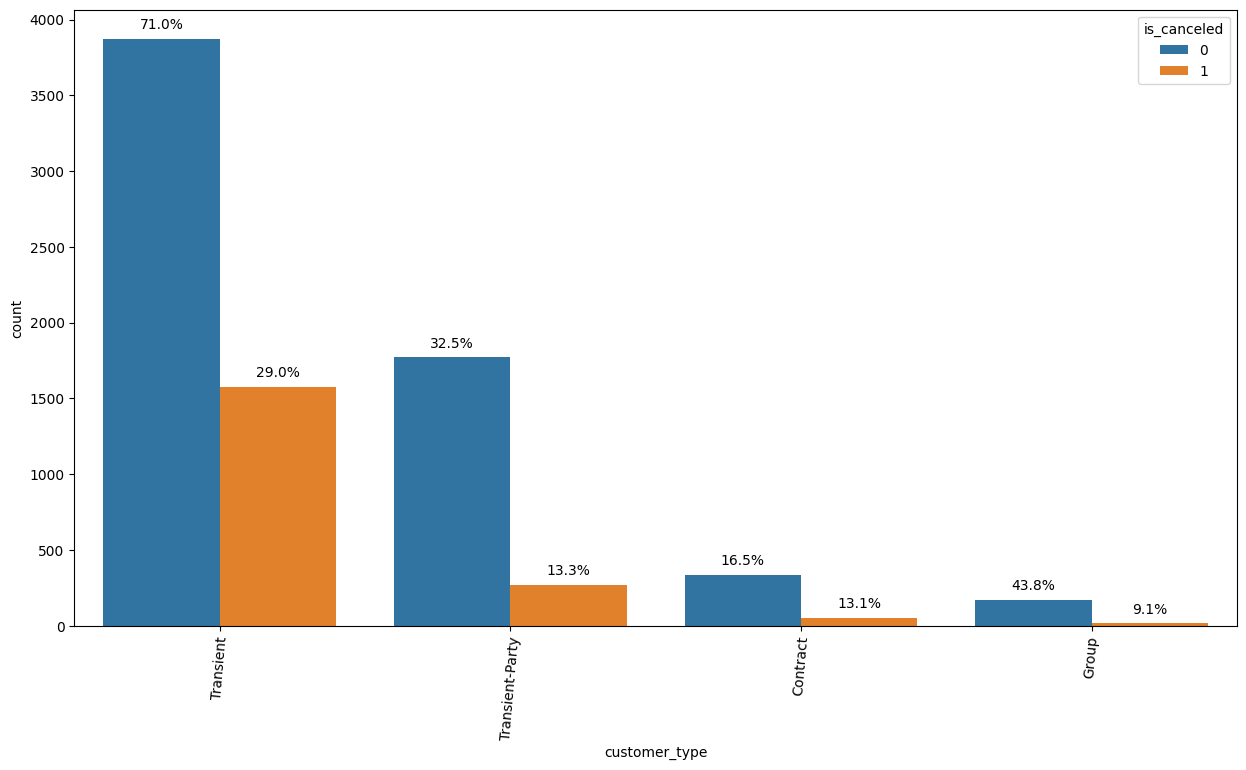

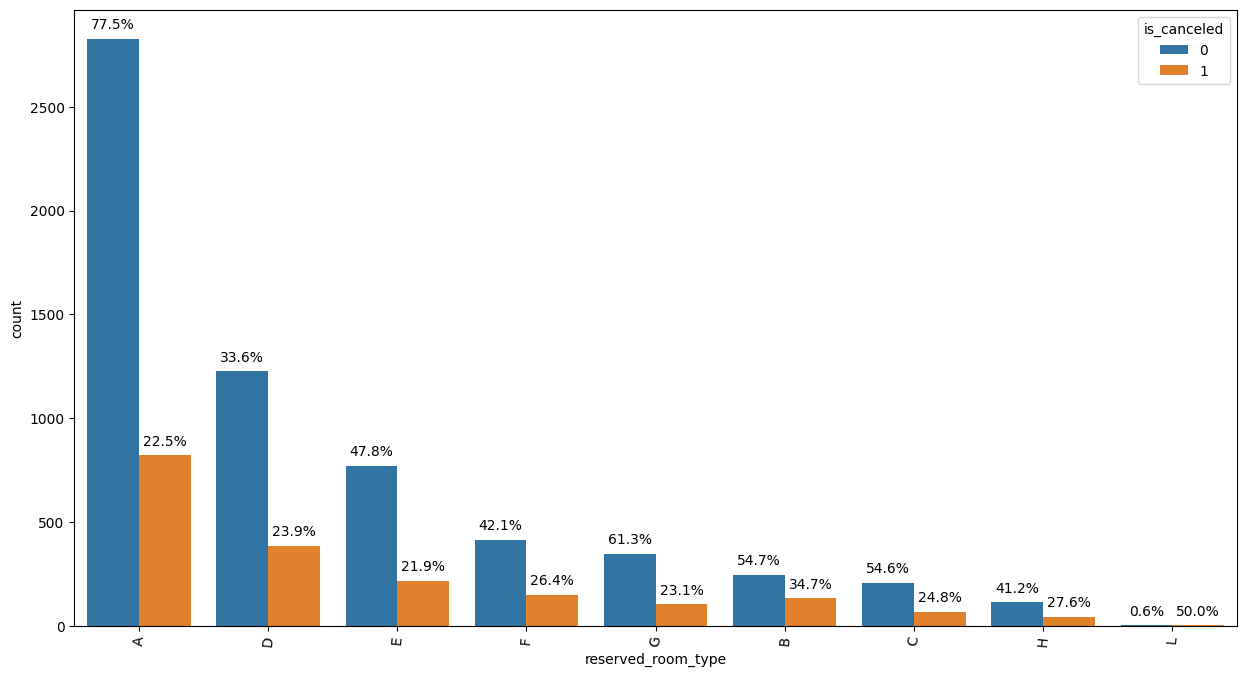

In [72]:
#Visualisasi data menggunakan histogram dalam melakukan bivariate analysis
for x in df_train.select_dtypes(exclude='number'):
    plt.figure(figsize=(15, 8), dpi=100)
    
    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = df_train[x].value_counts(ascending=False)
    
    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=df_train, x=x, hue='is_canceled', order=count_values.index)
    
    # Hitung jumlah total per unique value di kolom 'x'
    total_per_category = df_train.groupby(x).size()
    
    for p in ax.patches:
        if p.get_x()!=0:
            # Ambil nilai kategori x dari posisi batang
            category_index = int(p.get_x() + p.get_width() / 2)

            # Cari nama kategori dari index urutan
            category_name = count_values.index[category_index]

            # Hitung proporsi per kategori
            prop = p.get_height() / total_per_category.loc[category_name]

            # Tambahkan anotasi persentase
            percentage = '{:.1f}%'.format(100 * prop)
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

    # Rotasi label sumbu-x agar lebih mudah dibaca
    plt.xticks(rotation=85)

    plt.show()


## Data Preprocess

### Group Country Using Continent

* Dikarenakan jumlah unik value dalam kolom country terlalu banyak yang jika kita encode data kategorik tersebut akan menghasilkan banyak kolom untuk merepresentasikan masing-masing unik value. Sehingga hal tersebut akan berpengrauh pada model dan menghasilkan nilai f1 score yang rendah

In [81]:
#Mengelompokan country code berdasarkan continent
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE','GIB', 'JEY', 'GGY', 'IMN', 'FRO']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM','CYM', 'JAM', 'DOM', 'BHS', 'KNA', 'VGB',
         'GLP', 'BRB', 'ABW', 'AIA', 'DMA', 'LCA']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE','CPV', 'COM', 'STP', 'MYT']

australia=['AUS']

others=['FJI', 'NZL', 'PLW', 'PYF', 'NCL', 'KIR', 'ASM', 'ATA', 'ATF','UMI']

In [82]:
# Membuat kolom baru continent 
def continent(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'  
    else:
        return 'Others'


X_train['Continent'] = X_train['country'].apply(continent)
X_test['Continent'] = X_test['country'].apply(continent)
X['Continent'] = X['country'].apply(continent)

## Final Feature

In [84]:
#Membuang kolom country dan menambahkan kolom continent
fitur=['market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'Continent']

X_train=X_train[fitur]
X_test=X_test[fitur]

* Setelah kita melakukan pengelompokan pada kolom country, maka kolom country dapat kita buang dan digantikan dengan kolom Continent

## Preprocess

* dalam step ini data kategorik akan kita encode sehingga mempermudah dalam permodelan

In [97]:
# Encode data kategorik sebelum dilakukan modeling
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list','required_car_parking_spaces', 'total_of_special_requests']),
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['Continent', 'market_segment', 'reserved_room_type'])
])

In [69]:
# Step 2: Terapkan transformer ke data X_train
X_transformed = transformer.fit_transform(X_train)

# Step 3: Ambil nama kolom hasil dari OneHotEncoder
onehot_feature_names = transformer.named_transformers_['onehot'].get_feature_names_out(['deposit_type', 'customer_type'])

# Step 4: Ambil nama kolom hasil dari BinaryEncoder secara otomatis
binary_encoded_columns = transformer.named_transformers_['binary'].transform(X_train[['Continent', 'market_segment', 'reserved_room_type']])
binary_feature_names = binary_encoded_columns.columns.tolist()

# Step 5: Kolom lain yang tidak diubah oleh ColumnTransformer
passthrough_columns = X_train.columns.difference(['deposit_type', 'customer_type', 'Continent', 'market_segment', 'reserved_room_type']).tolist()

# Gabungkan semua nama kolom dengan urutan yang benar
all_columns = list(onehot_feature_names) + binary_feature_names + passthrough_columns

# Step 6: Ubah hasil transformasi kembali menjadi DataFrame dengan nama kolom yang benar
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Tampilkan DataFrame
X_transformed_df.head()

,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Continent_0,Continent_1,Continent_2,market_segment_0,market_segment_1,market_segment_2,market_segment_3,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,booking_changes,days_in_waiting_list,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,0.0,0.0,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,-0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,2.0,0.0,1.0,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


## Modeling

* Selanjutnya kita akan melakukan modeling menggunakan beberapa machine learning untuk mencari model terbaik dalam memprediksi hotel cancellation

In [155]:
# Memanggil seluruh Machine Learning yang akan digunakan 
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier() 
cat= CatBoostClassifier()
ada= AdaBoostClassifier()
gradient= GradientBoostingClassifier()

In [157]:
# Menghitung nilai f1 score dari masing-masing model
models = [logreg,knn,dt,rf,xgb,cat,ada,gradient]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=ImbPipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','CatBoost','AdaBoost','GradientBoost'],'mean f1 Score':rata,'sdev':std}).set_index('model').sort_values(by='mean f1 Score',ascending=False)

Learning rate set to 0.02284
0:	learn: 0.6751702	total: 2.83ms	remaining: 2.82s
1:	learn: 0.6573416	total: 5.25ms	remaining: 2.62s
2:	learn: 0.6421607	total: 7.91ms	remaining: 2.63s
3:	learn: 0.6299274	total: 10.4ms	remaining: 2.58s
4:	learn: 0.6162457	total: 12.6ms	remaining: 2.51s
5:	learn: 0.6091497	total: 14.8ms	remaining: 2.45s
6:	learn: 0.6014699	total: 17.4ms	remaining: 2.46s
7:	learn: 0.5899687	total: 19.6ms	remaining: 2.43s
8:	learn: 0.5827699	total: 21.9ms	remaining: 2.41s
9:	learn: 0.5762383	total: 24.3ms	remaining: 2.4s
10:	learn: 0.5678196	total: 26ms	remaining: 2.34s
11:	learn: 0.5579493	total: 28.4ms	remaining: 2.34s
12:	learn: 0.5499935	total: 30.5ms	remaining: 2.31s
13:	learn: 0.5439420	total: 33.1ms	remaining: 2.33s
14:	learn: 0.5356917	total: 35.8ms	remaining: 2.35s
15:	learn: 0.5312761	total: 38.6ms	remaining: 2.37s
16:	learn: 0.5262453	total: 41.2ms	remaining: 2.38s
17:	learn: 0.5223643	total: 43.6ms	remaining: 2.38s
18:	learn: 0.5174276	total: 46.3ms	remaining: 2.

,mean f1 Score,sdev
model,,
XGBoost,0.391670,0.035769
CatBoost,0.386849,0.024021
KNN,0.383981,0.018694
Random Forest,0.369183,0.031175
GradientBoost,0.366647,0.031991
AdaBoost,0.352003,0.029668
Decision Tree,0.346261,0.029121
Logistic Regression,0.300390,0.010328


* Dari 8 Machine Learning yang telah di coba hanya 5 Machine learning yang memiliki f1 score terbesar yang akan kita hypertunning & akan kita applied Oversampling menggunakan SMOTE

## Modeling Pipeline Tanpa Oversampling

* Setelah mendapatkan 5 model terbaik, model akan kita tuning demi mendapatkan hasil yang lebih maksimal selain itu penggunaan Pipeline disini untuk mencari model terbaik dari semua kemungkinan

In [244]:
# Definisikan pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', transformer),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', XGBClassifier())  
])



param_grid = [
    # Gradient Boosting
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__max_depth': [3, 5, 7],  # Maksimal depth of trees
        'classifier__subsample': [0.6, 0.8, 1.0]  # Subsample ratio of the training instance
    },
    
    # K-Nearest Neighbors (KNN)
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],  # Jumlah neighbors
        'classifier__weights': ['uniform', 'distance'],  # Weight function
        'classifier__p': [1, 2]  # Distance metric: p=1 (Manhattan), p=2 (Euclidean)
    },
    
    # CatBoost
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [CatBoostClassifier(verbose=0)],  # CatBoost dengan verbose=0 untuk mematikan output di konsol
        'classifier__iterations': [100, 200, 300],  # Jumlah iterasi
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__depth': [4, 6, 8],  # Kedalaman pohon
        'classifier__l2_leaf_reg': [1, 3, 5]  # L2 regularization
    },
    
    # XGBoost
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__max_depth': [3, 5, 7],  # Kedalaman pohon
        'classifier__subsample': [0.6, 0.8, 1.0]  # Subsample ratio of the training instance
    },
    
    # Random Forest
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }
]



# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 247.55 seconds


In [250]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Continent',
                                                   'market_segment',
                                                   'reserved_room_type'])])),
                ('feature_selection', SelectKBest()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [252]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

print('Train')
print(classification_report(y_train,y_pred_train))
print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6150
           1       0.55      0.38      0.45      1917

    accuracy                           0.78      8067
   macro avg       0.69      0.64      0.66      8067
weighted avg       0.76      0.78      0.76      8067

Test
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1538
           1       0.59      0.41      0.48       479

    accuracy                           0.79      2017
   macro avg       0.71      0.66      0.68      2017
weighted avg       0.77      0.79      0.78      2017



* Dapat dilihat setelah melakukan tuning nilai f1 score meningkat, selanjutnya kita akan melakukan modeling menggunakan sampling untuk membandingkan model yang lebih layak digunakan

## Modeling dengan Pipeline dengan oversampling

In [99]:
# Definisikan pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', transformer),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('resampling', SMOTE()),  # Oversampling dengan SMOTE
    ('classifier', XGBClassifier())  
])



param_grid = [
    # Gradient Boosting
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__max_depth': [3, 5, 7],  # Maksimal depth of trees
        'classifier__subsample': [0.6, 0.8, 1.0]  # Subsample ratio of the training instance
    },
    
    # K-Nearest Neighbors (KNN)
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],  # Jumlah neighbors
        'classifier__weights': ['uniform', 'distance'],  # Weight function
        'classifier__p': [1, 2]  # Distance metric: p=1 (Manhattan), p=2 (Euclidean)
    },
    
    # CatBoost
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [CatBoostClassifier(verbose=0)],  # CatBoost dengan verbose=0 untuk mematikan output di konsol
        'classifier__iterations': [100, 200, 300],  # Jumlah iterasi
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__depth': [4, 6, 8],  # Kedalaman pohon
        'classifier__l2_leaf_reg': [1, 3, 5]  # L2 regularization
    },
    
    # XGBoost
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__max_depth': [3, 5, 7],  # Kedalaman pohon
        'classifier__subsample': [0.6, 0.8, 1.0]  # Subsample ratio of the training instance
    },
    
    # Random Forest
    {
        'feature_selection__k': [5, 10],  # Ubah nilai k dari 5 hingga 10
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # Jumlah estimators
        'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }
]



# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 401.38 seconds


In [101]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Continent',
                                                   'market_segment',
                                                   'reser...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [261]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

print('Train')
print(classification_report(y_train,y_pred_train))
print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      6150
           1       0.45      0.78      0.58      1917

    accuracy                           0.73      8067
   macro avg       0.68      0.75      0.69      8067
weighted avg       0.80      0.73      0.74      8067

Test
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1538
           1       0.47      0.82      0.60       479

    accuracy                           0.74      2017
   macro avg       0.70      0.77      0.70      2017
weighted avg       0.82      0.74      0.76      2017



* Dapat dilihat dari report calssification di atas nilai f1 score meningkat setelah dilakukan Oversampling menggunakan smote, Sehinnga dapat disimpulkan model belajar lebih baik dari data jika data di sampling untuk menghandle imbalance

## Feature Importance
* Setelah melakukan modeling, kita akan menarik feature terpenting dalam model sehingga dapat menjadi pertimbangan bagi manajemen hotel jika ingin meminimalisir booking cancelation

In [267]:
# Extract the SelectKBest step
select_k_best = gscv.best_estimator_.named_steps['feature_selection']

# Extract the column transformer step
column_transformer = gscv.best_estimator_.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num1_feature_names= column_transformer.named_transformers_['scaler'].get_feature_names_out(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'])


ohe_feature_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(['deposit_type', 'customer_type'])

binary_feature_names = column_transformer.named_transformers_['binary'].get_feature_names_out(['market_segment','reserved_room_type',
       'Continent'])
   
feat_cols=list(num1_feature_names)+list(ohe_feature_names)+list(binary_feature_names)
select_k_best.get_feature_names_out(feat_cols)

array(['previous_cancellations', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type_Non Refund', 'customer_type_Transient',
       'customer_type_Transient-Party', 'market_segment_1',
       'market_segment_2', 'market_segment_3'], dtype=object)

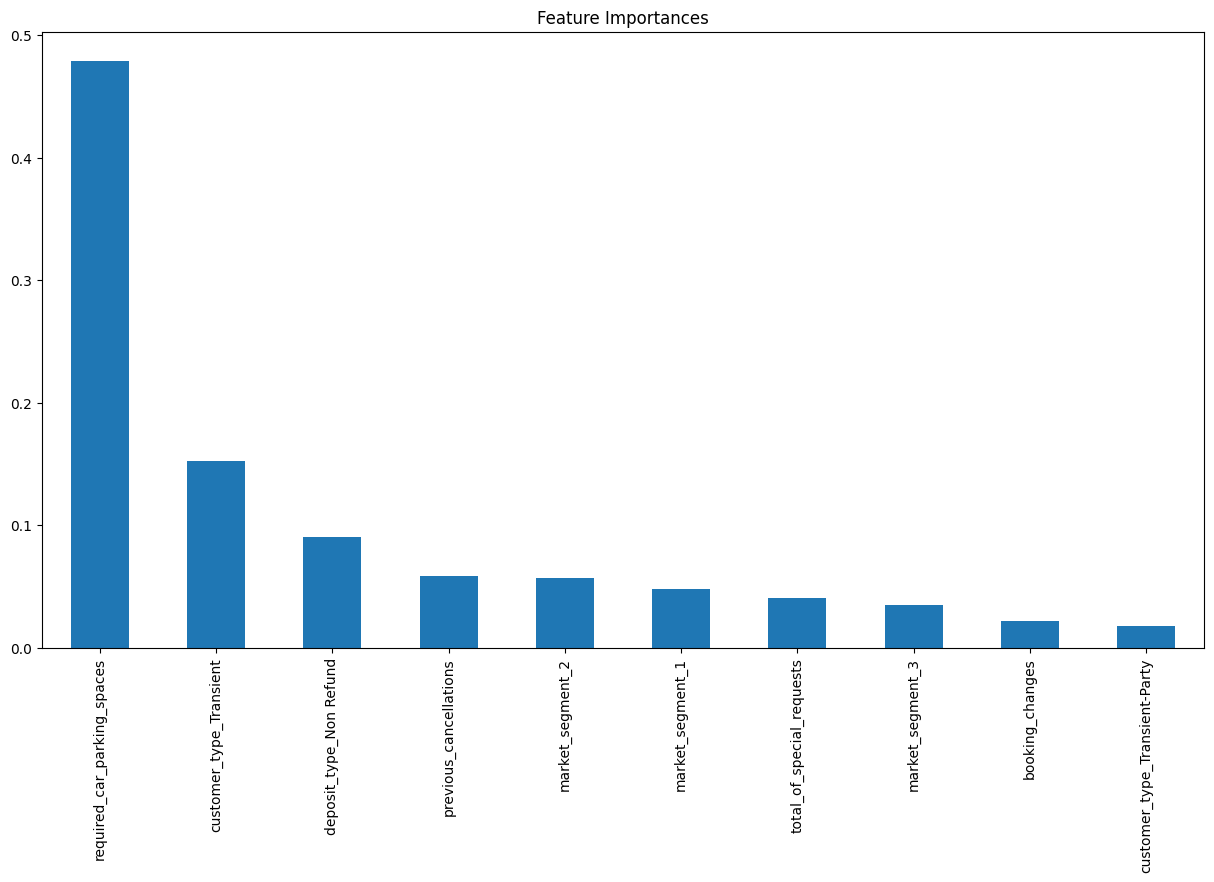

In [269]:
# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['classifier']


feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]


model_coef1 = pd.Series(best_model.feature_importances_, selected_feature_names).sort_values(ascending = False)
plt.figure(figsize=(15,8))
model_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

* dari visualisasi di atas dapat diketahui feature apa saja yang memiliki pengaruh besar terhadap hotel cancelation

 98%|===================| 7880/8067 [00:30<00:00]        

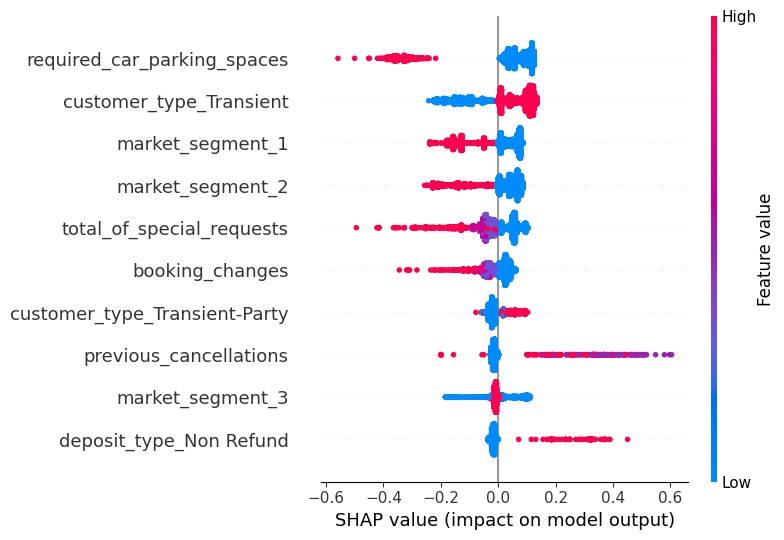

In [184]:
import shap

# Apply preprocessing to the training data
X_train_preprocessed = gscv.best_estimator_.named_steps['preprocessor'].transform(X_train)

# Apply feature selection to the preprocessed data
X_train_selected = gscv.best_estimator_.named_steps['feature_selection'].transform(X_train_preprocessed)

# Get the feature names after selection
feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['classifier']

X_train_selected=pd.DataFrame(X_train_selected)
# X_train_selected
X_train_selected.columns=selected_feature_names

# X_train_selected
shap_values=shap.TreeExplainer(best_model,data=X_train_selected,model_output='probability').shap_values(X_train_selected)
#plot shap
shap.summary_plot(shap_values,X_train_selected, feature_names=X_train_selected.columns)

In [263]:
y_pred=gscv.best_estimator_.predict(X_test)

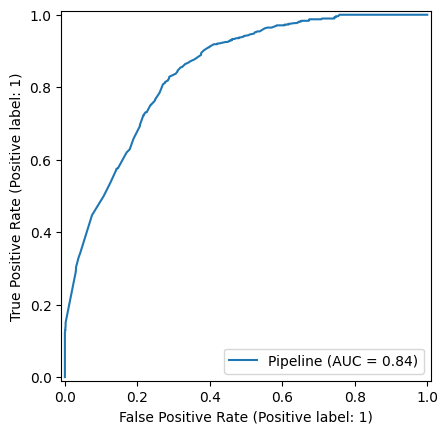

In [265]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)
plt.show()

## Threshold Optimization

* Menentukan threshold terbaik sehingga model dapat memberikan hasil prediksi yang memuaskan

In [271]:
model=gscv.best_estimator_
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

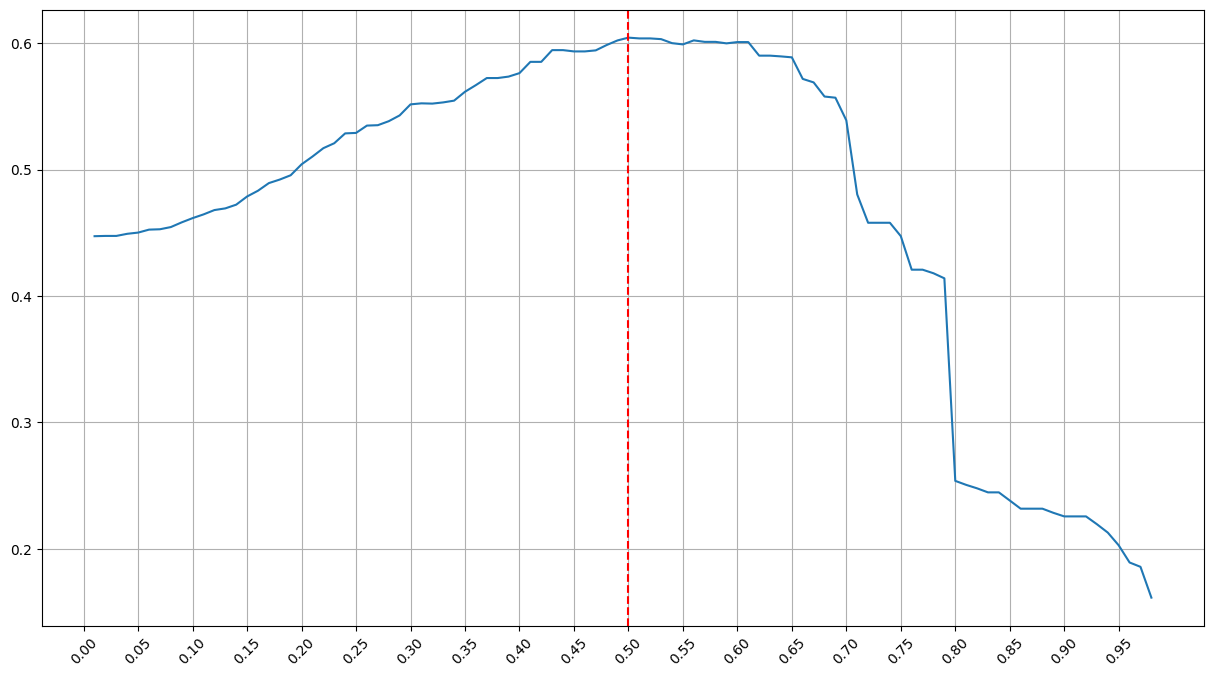

In [321]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.axvline(x=0.5, linestyle='--',color='red')
plt.show()

## Threshold Optimum

In [103]:
y_prob_train=gscv.best_estimator_.predict_proba(X_train)[:,1]
y_prob_train=np.where(y_prob_train>0.5,1,0)

y_prob_test=gscv.best_estimator_.predict_proba(X_test)[:,1]
y_prob_test=np.where(y_prob_test>0.53,1,0)

* tidak ada perubahan dalam Threshold dikarenakan berdasarkan lineplot Threshold Optimization berada di 0.5

In [317]:
print(classification_report(y_train,y_prob_train))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      6150
           1       0.46      0.77      0.57      1917

    accuracy                           0.73      8067
   macro avg       0.68      0.74      0.69      8067
weighted avg       0.80      0.73      0.75      8067



In [307]:
print(classification_report(y_test,y_prob_test))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1538
           1       0.49      0.79      0.60       479

    accuracy                           0.75      2017
   macro avg       0.70      0.77      0.71      2017
weighted avg       0.82      0.75      0.77      2017



## Cross Validation

In [360]:
# Melakukan cross-validation dengan model terbaik
best_model_cv = cross_val_score(gscv.best_estimator_, X_train, y_train, cv=skfold, scoring='f1')

# Menampilkan hasil cross-validation
print('Cross-validation F1 scores:', best_model_cv)
print('Mean F1 score:', best_model_cv.mean())


Cross-validation F1 scores: [0.55482662 0.57309942 0.52262235 0.57889642 0.54      ]
Mean F1 score: 0.5538889590846822


In [362]:
# Melakukan cross-validation dengan model terbaik
best_model_cv = cross_val_score(gscv.best_estimator_, X_test, y_test, cv=skfold, scoring='f1')

# Menampilkan hasil cross-validation
print('Cross-validation F1 scores:', best_model_cv)
print('Mean F1 score:', best_model_cv.mean())


Cross-validation F1 scores: [0.57587549 0.62096774 0.56923077 0.56179775 0.58964143]
Mean F1 score: 0.5835026369239025


* dapat dilihat dari hasi Cross Validation Score dapat diketahui bahwa model cukup konsisten dalam memprediksi data

## Kelompok Customer berdasarkan probability cancelation

In [129]:
# Define custom bin edges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Use pd.cut with custom bins
proba_cancel_train['cancel_bin_cut'] = pd.cut(proba_cancel_train[1], bins=bins, labels=False)

# Display the updated DataFrame
proba_cancel_train.head(3)

,0,1,cancel_bin_cut
0,0.207906,0.792094,3
1,0.999496,0.000504,0
2,0.907588,0.092412,0


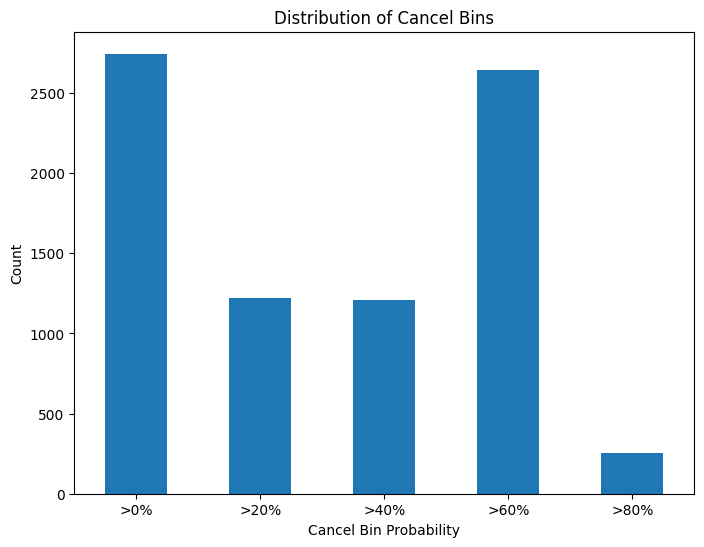

In [139]:
# Define custom bin edges as percentages
bin_labels = ['>0%', '>20%', '>40%', '>60%', '>80%']

# Plot the bar plot and adjust the xticks
plt.figure(figsize=(8, 6))
proba_cancel_train['cancel_bin_cut'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Cancel Bins')
plt.xlabel('Cancel Bin Probability')
plt.ylabel('Count')

# Set xticks with custom percentage labels
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=0)
plt.show()


# Kesimpulan & Rekomendasi

**Kesimpulan**
Dapat disoroti dari hasil terbaik model yang telah dibangun terdapat beberapa poin penting yaitu:

1. **Kinerja Model**:

    * **Limitasi**:
      - Pada dataset ini data tidak terdistribusi normal sehingga apabila pada data yang akan datang memiliki sebaran data yang normal dapat mempengaruhi akurasi dari modeling
    
      - Pada dataset ini jumlah missing value tidak begitu banyak sehingga missing value pada data dibuang, jika pada data yang akan datang memiliki jumlah missing value yang banyak sehingga data tidak dapat di buang, maka pada model ini belum dapat di handle dan dipertimbangkan untuk menghandle missing value terlebih dahulu
     
      - Variansi data hanya mencakup pada:
         1. `previous_cancellations`:  0 - 24 kali pembataln sebelumnya
            
         3. `booking_changes`: 0 - 21 kali perubahan booking
            
         5. `days_in_waiting_list`: 0 - 391 hari di waiting list
            
         7. `required_car_parking_spaces`: 0 - 8 wilayah parkir
            
         9. `total_of_special_requests`: 0 - 5 special request yang diminta
       
        di luar range data ini model belum dapat memprediksi dengan baik.

    * **Metrik**:
      - Model menghasilkan Metrik f1 Score yang baik dengan 60% model dapat memprediksi pelanggan yang akan melakukan pembatalan hotel, dan 82% pelanggan yang tidak melakukan pembatalan. 

2. **Model Terbaik**:
   * Model yang memberikan performa terbaik adalah XGBoost yang telah ditunning serta dilakukan oversampling terlebih dahulu, dimana pada modeling diterapkan metode SMOTE
   
3. **Interpretasi Hasil**:
   * **Feature Importances**:
     model memiliki 3 fitur yang sangat berpengrauh terhadap pembatalan hotel booking, yaitu jumlah kebutuhan wilayah parkir, tipe customer, dan deposit atau non deposit. dari fitur tersebut administrasi hotel dapat mempertimbangkan untuk memprioritaskan pelanggan yang melakukan deposit, membutuhkan wilayah parkir yang banyak, dan melakukan booking untuk group dikarenakan kelompok pelanggan tersebut memiliki kecenderungan kecil dalam melakukan pembatalan, dan sebaliknya. team manajemen hotel juga dapat meningkatkan fasilitas parkir dan pelanggan dengan jumlah besar dikarenakan pelanggan tersebut memiliki kecenderungan tidak melakukan pembatalan.


**Rekomendasi**
Berdasarkan hasil model yang di dapatkan, berikut beberapa rekomendasi yang dapat diberikan:
    
* **Peningkatan Model**:
Performa model sudah cukup baik tetapi masih terdapat ruang untuk peningkatan, serta dilihat dari hasil modeling diketahui bahwa data Underfitt sehingga harus menggunakan model dengan kompleksitas tinggi. Salah satu saran yang dapat dilakukan untuk meningkatkan performa modeling anatar lain menambahkan fitur-fitur yang lebih yang berpengaruh seperti jumlah orang dalam pemesanan, jumlah kamar yang di pesan.
    
* **Penggunaan dalam Bisnis**:
  
    Penggunaan Model ini dapat diterapkan saat pelanggan melakukan pemesanan sehingga team adminitrasi dapat langsung memprediksi apakah kemungkinan pelanggan akan membatalkan pemesanan tersebut sehingga efisiensi kamar dapat di kelola dengan baik
        
    dengan memprediksi secara langsung perusahaan dapat mengefisiensi kamar untuk pelanggan lain sehingga hal tersebut dapat mendorong profit perusahaan
    
* **Tindakan Lebih Lanjut**:
     * Dibutuhkan peningkatan model sehingga dapat memberikan hasil prediksi yang lebih akurat
    
     * Penerapan Model secara langsung pada lingkup administrasi hotel

## Deployment

`Save to pickle (.sav)`

In [79]:
import pickle

In [81]:
#fit ke train+test
gscv.best_estimator_.fit(X,y)


filename='model_hotel_cancelation_predict.sav'
pickle.dump(gscv.best_estimator_,open(filename,'wb'))